In [65]:
import pandas as pd
import numpy as np
import time
import datetime
import gc
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [66]:
path = '/Users/apple/Desktop/data/basicclick_data/'
   
train = pd.read_csv(path+'train_all.csv')
test = pd.read_csv(path+'test_all.csv')
data = pd.concat([train, test])


In [67]:
 # 商品分时间段曝光比例，得到每个item_id在每个时间段实例数量占比
exp_tz = data.groupby(['item_id', 'maphour']).instance_id.nunique().to_frame()
exp_tz.columns = ['item_maphour_cnt']
exp_tz = exp_tz.reset_index()
exp_tz['item_maphour_cnt_ratio'] = round(exp_tz.item_maphour_cnt / exp_tz.groupby('item_id').item_maphour_cnt.transform(np.sum), 5)
exp_tz = exp_tz[['item_id', 'maphour', 'item_maphour_cnt_ratio']]
data = data.merge(exp_tz, how='left', on=['item_id', 'maphour'])

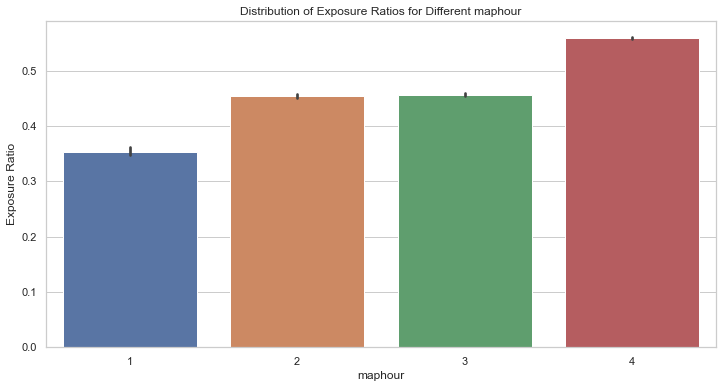

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with NaN values in 'item_maphour_cnt_ratio'
filtered_data = data.dropna(subset=['item_maphour_cnt_ratio'])

# Exclude the 'item_id' from the plot
maphour_plot_data = filtered_data[['maphour', 'item_maphour_cnt_ratio']]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='maphour', y='item_maphour_cnt_ratio', data=maphour_plot_data)

# Set labels and title
plt.xlabel('maphour')
plt.ylabel('Exposure Ratio')
plt.title('Distribution of Exposure Ratios for Different maphour')

# Show the plot
plt.show()


具体解释如下：

x 轴表示不同的时间段（maphour）。
y 轴表示对应时间段内商品曝光比例的均值（或中位数，具体取决于条形图的高度展示）。
每个条形图的高度反映了该时间段内商品曝光比例的平均水平。

比较不同时间段内商品曝光比例的平均水平：了解商品曝光比例在不同时间段的分布趋势，图中每个条形的高度越高，表示该时间段内商品曝光比例越大。整体趋势可以帮助你分析商品在不同时间段的受欢迎程度，并可能有助于制定相关的营销或推广策略。

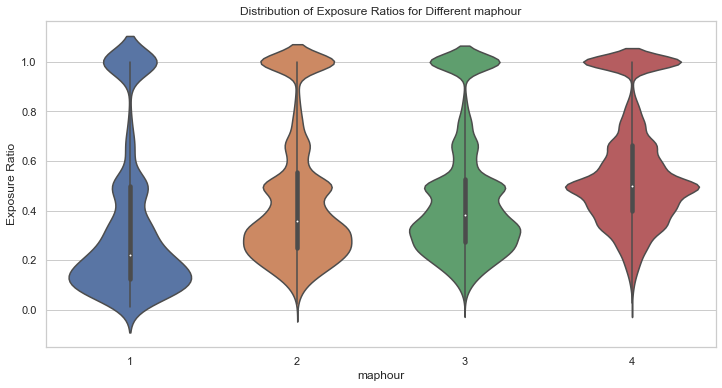

In [69]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='maphour', y='item_maphour_cnt_ratio', data=maphour_plot_data)
plt.xlabel('maphour')
plt.ylabel('Exposure Ratio')
plt.title('Distribution of Exposure Ratios for Different maphour')
plt.show()


形状： Violin图的整体形状代表了数据的分布。它是左右对称的，其中的粗度表示数据的相对频率或密度。

中间的白点： 中间的白点通常表示中位数。中位数是将数据分为两半的值，即50%的观察值在中位数的左侧，50%在右侧。

箱线图： Violin图中间的矩形框代表了四分位数范围，包括上下四分位数（Q1和Q3）。箱线图提供了关于数据的离散程度和中间50%观察值的信息。

细长的尾部： Violin图的细长尾部延伸到箱线图的外部，提供了有关数据分布的额外信息。如果尾部较长，说明数据分布的离散度较大。

核密度估计： Violin图的宽度在垂直方向上表示在某个值处的数据点密度。更宽的部分意味着在该位置有更多的数据点。

In [70]:
# 用户id每小时曝光数，得到每个user_id在每个hour的实例数量占比
exp_hour = data.groupby(['user_id', 'hour']).instance_id.nunique().to_frame()
exp_hour.columns = ['user_hour_cnt']
exp_hour = exp_hour.reset_index()
#通过计算每个用户在每个小时的实例数量占总数的比例
#得到的是每个用户在每个小时内的广告曝光相对于该用户总曝光数的比例。
# 这个比例可以反映出用户在不同时间段内被暴露给广告的程度，即在每个小时内广告曝光在总体曝光中的占比。
exp_hour['user_hour_cnt_ratio'] = round(exp_hour.user_hour_cnt / exp_hour.groupby('user_id').user_hour_cnt.transform(np.sum), 5)
exp_hour = exp_hour[['user_id', 'hour', 'user_hour_cnt_ratio']]
data = data.merge(exp_hour, how='left', on=['user_id', 'hour'])

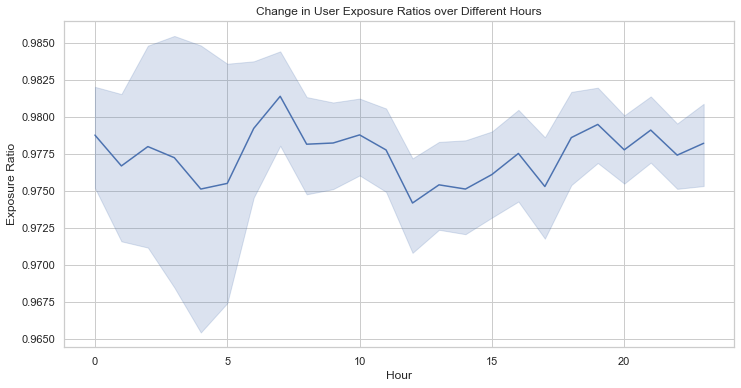

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with NaN values in 'user_hour_cnt_ratio'
filtered_data = data.dropna(subset=['user_hour_cnt_ratio'])

# Exclude the 'user_id' from the plot
user_hour_plot_data = filtered_data[['hour', 'user_hour_cnt_ratio']]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='user_hour_cnt_ratio', data=user_hour_plot_data)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Exposure Ratio')
plt.title('Change in User Exposure Ratios over Different Hours')

# Show the plot
plt.show()


可以了解用户在一天内的不同时间段内对广告的关注程度。例如，曲线上升的时段可能是用户活跃度较高，广告曝光更容易引起用户的注意。相反，曲线下降的时段可能是用户较为不活跃，广告曝光相对不那么显著。这样的分析有助于确定何时进行广告投放以提高曝光效果。

In [72]:
# 每个user_id在每个时间段的实例数量
exp_tz = data.groupby(['user_id', 'maphour']).instance_id.nunique().to_frame()
exp_tz.columns = ['user_maphour_cnt']
exp_tz = exp_tz.reset_index()
exp_tz['user_maphour_cnt_ratio'] = round(exp_tz.user_maphour_cnt / exp_tz.groupby('user_id').user_maphour_cnt.transform(np.sum), 5)
exp_tz = exp_tz[['user_id', 'maphour', 'user_maphour_cnt_ratio']]
data = data.merge(exp_tz, how='left', on=['user_id', 'maphour'])
gc.collect() #垃圾回收机制

21118

In [73]:
#user_id和context_timestamp进行分组，并统计每个分组中的不重复的数量
add = pd.DataFrame(data.groupby(["user_id", "context_timestamp"]).instance_id.nunique()).reset_index()
add.columns = ["user_id", "context_timestamp", "same_time_expo_cnt"]
data = data.merge(add, on=["user_id", "context_timestamp"], how="left")

In [74]:
# 小时均值特征
grouped = data.groupby('user_id')['hour'].mean().reset_index()
grouped.columns = ['user_id', 'user_mean_hour']
data = data.merge(grouped, how='left', on='user_id')
grouped = data.groupby('item_id')['hour'].mean().reset_index()
grouped.columns = ['item_id', 'item_mean_hour']
data = data.merge(grouped, how='left', on='item_id')
grouped = data.groupby('item_brand_id')['hour'].mean().reset_index()
grouped.columns = ['item_brand_id', 'brand_mean_hour']
data = data.merge(grouped, how='left', on='item_brand_id')
grouped = data.groupby('shop_id')['hour'].mean().reset_index()
grouped.columns = ['shop_id', 'shop_mean_hour']
data = data.merge(grouped, how='left', on='shop_id')

In [75]:
# 年龄均值特征
grouped = data.groupby('user_id')['user_age_level'].mean().reset_index()
grouped.columns = ['user_id', 'user_mean_age']
data = data.merge(grouped, how='left', on='user_id')

grouped = data.groupby('item_id')['user_age_level'].mean().reset_index()
grouped.columns = ['item_id', 'item_mean_age']
data = data.merge(grouped, how='left', on='item_id')

grouped = data.groupby('item_brand_id')['user_age_level'].mean().reset_index()
grouped.columns = ['item_brand_id', 'brand_mean_age']
data = data.merge(grouped, how='left', on='item_brand_id')

grouped = data.groupby('shop_id')['user_age_level'].mean().reset_index()
grouped.columns = ['shop_id', 'shop_mean_age']
data = data.merge(grouped, how='left', on='shop_id')

## EDA

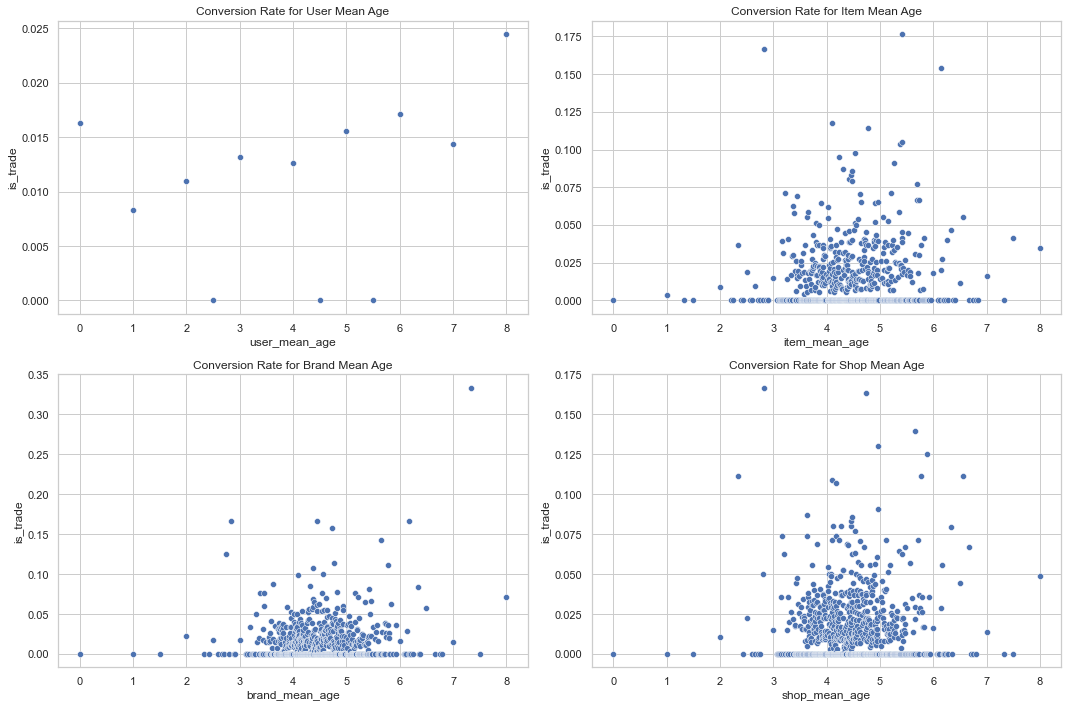

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算每个均值水平下转化率为1的比例
conversion_rate_by_user_age = data.groupby('user_mean_age')['is_trade'].mean().reset_index()
conversion_rate_by_item_age = data.groupby('item_mean_age')['is_trade'].mean().reset_index()
conversion_rate_by_brand_age = data.groupby('brand_mean_age')['is_trade'].mean().reset_index()
conversion_rate_by_shop_age = data.groupby('shop_mean_age')['is_trade'].mean().reset_index()

# 创建子图
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 摊平轴以便于轻松迭代
axes = axes.flatten()

# 绘制用户均值与转化率为1的比例的散点图
sns.scatterplot(x='user_mean_age', y='is_trade', data=conversion_rate_by_user_age, ax=axes[0])
axes[0].set_title('Conversion Rate for User Mean Age')

# 绘制商品均值与转化率为1的比例的散点图
sns.scatterplot(x='item_mean_age', y='is_trade', data=conversion_rate_by_item_age, ax=axes[1])
axes[1].set_title('Conversion Rate for Item Mean Age')

# 绘制品牌均值与转化率为1的比例的散点图
sns.scatterplot(x='brand_mean_age', y='is_trade', data=conversion_rate_by_brand_age, ax=axes[2])
axes[2].set_title('Conversion Rate for Brand Mean Age')

# 绘制店铺均值与转化率为1的比例的散点图
sns.scatterplot(x='shop_mean_age', y='is_trade', data=conversion_rate_by_shop_age, ax=axes[3])
axes[3].set_title('Conversion Rate for Shop Mean Age')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


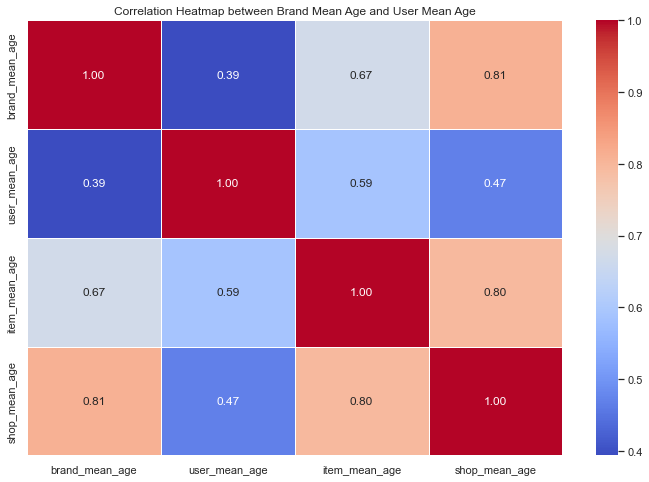

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(data[['brand_mean_age', 'user_mean_age','item_mean_age','shop_mean_age']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap between Brand Mean Age and User Mean Age')
plt.show()


brand shop相关性较高，说明品牌的年龄可能与店铺的年龄有一定的关联，用户可能更倾向于在喜欢的品牌下购物，而这些品牌很可能在同一时间也出现在特定的店铺中。因此，品牌和店铺之间的相关性可能反映了用户对特定品牌的忠诚度。

新构造了四个特征分别为user_mean_age 每个用户用户均值年龄,item_mean_age,表示购买某个商品的用户的平均年龄，brand_mean_age,购买某个品牌商品的用户的平均年龄，shop_mean_age,表示购买某家店铺商品的用户的平均年龄。如上述热力图所示，品牌的均值年龄与店铺的均值年龄相关性高（相关系数为0.81），品牌的均值年龄与商品的均值年龄相关性高为0.8，但是品牌的均值年龄与商品的均值年龄没有很高（相关系数0.67），可以反映出如下的投放策略：这表明品牌和店铺在年龄特征上有很强的关联。这可能意味着品牌在广告投放中与店铺形成了一种协同效应，用户更容易将品牌与店铺联系在一起，在广告策略上，品牌和店铺可以共同进行广告投放，强调它们之间的合作关系，提高用户对广告的认知度和信任度。投放时可以突出店铺与商品的匹配性，使用户感受到一种整体的购物体验。表明品牌与商品在年龄特征上的关联性相对较弱。这可能意味着品牌更注重传达整体品牌形象，而不是侧重于强调商品的年龄特征。由于品牌与商品在年龄特征上的关联性较低，品牌可以更注重传达核心理念、品牌故事等元素，建立品牌的独特性。


In [15]:
 #小时特征,每个用户计算活动
add = pd.DataFrame(data.groupby(["user_id"]).hour.nunique()).reset_index()
add.columns = ["user_id", "user_active_hour"]
data = data.merge(add, on=["user_id"], how="left")

In [16]:
# 不同用户在每一天的活跃城市数量
add = pd.DataFrame(data.groupby(["user_id", "day"]).item_city_id.nunique()).reset_index()
add.columns = ["user_id", "day", "user_day_active_city"]
data = data.merge(add, on=["user_id", "day"], how="left")

In [17]:
#活跃user数特征
add = pd.DataFrame(data.groupby(["item_id", "day"]).user_id.nunique()).reset_index()
add.columns = ["item_id", "day", "item_day_active_user"]
data = data.merge(add, on=["item_id", "day"], how="left")
add = pd.DataFrame(data.groupby(["shop_id", "day"]).user_id.nunique()).reset_index()
add.columns = ["shop_id", "day", "shop_day_active_user"]
data = data.merge(add, on=["shop_id", "day"], how="left")
add = pd.DataFrame(data.groupby(["item_brand_id", "day"]).user_id.nunique()).reset_index()
add.columns = ["item_brand_id", "day", "brand_day_active_user"]
data = data.merge(add, on=["item_brand_id", "day"], how="left")



add = pd.DataFrame(data.groupby(["item_id", "day", "hour"]).user_id.nunique()).reset_index()
add.columns = ["item_id", "day", "hour", "item_hour_active_user"]
data = data.merge(add, on=["item_id", "day", "hour"], how="left")
add = pd.DataFrame(data.groupby(["shop_id", "day", "hour"]).user_id.nunique()).reset_index()
add.columns = ["shop_id", "day", "hour", "shop_hour_active_user"]
data = data.merge(add, on=["shop_id", "day", "hour"], how="left")

# 活跃shop数特征
add = pd.DataFrame(data.groupby(["user_id", "day"]).shop_id.nunique()).reset_index()
add.columns = ["user_id", "day", "user_day_active_shop"]
data = data.merge(add, on=["user_id", "day"], how="left")

# 活跃brand数特征 
add = pd.DataFrame(data.groupby(["user_id", "day"]).item_brand_id.nunique()).reset_index()
add.columns = ["user_id", "day", "user_day_active_brand"]
data = data.merge(add, on=["user_id", "day"], how="left")

add = pd.DataFrame(data.groupby(["user_id", "day", "hour"]).item_brand_id.nunique()).reset_index()
add.columns = ["user_id", "day", "hour", "user_hour_active_brand"]
data = data.merge(add, on=["user_id", "day", "hour"], how="left")

In [18]:
# 得到全部训练集
print('经过处理后,全部训练集最终维度:', data.shape)
data.to_csv(path+'all_01.csv', index=False)

# 得到7号训练集
data = data.loc[data.day==7]
print('7号训练集,最终维度:', data.shape)
print(data.columns.tolist())
data.to_csv(path+'day7_01.csv', index=False)

经过处理后,全部训练集最终维度: (99085, 55)
7号训练集,最终维度: (10184, 55)
['instance_id', 'item_id', 'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id', 'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id', 'context_timestamp', 'context_page_id', 'shop_id', 'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level', 'shop_score_service', 'shop_score_delivery', 'shop_score_description', 'is_trade', 'time', 'day', 'hour', 'minute', 'maphour', 'mapmin', 'item_category_0', 'item_category_1', 'item_category_2', 'item_maphour_cnt_ratio', 'user_hour_cnt_ratio', 'user_maphour_cnt_ratio', 'same_time_expo_cnt', 'user_mean_hour', 'item_mean_hour', 'brand_mean_hour', 'shop_mean_hour', 'user_mean_age', 'item_mean_age', 'brand_mean_age', 'shop_mean_age', 'user_active_hour', 'user_day_active_city', 'item_day_active_user', 'shop_day_active_user', 'brand_day_active_user', 'item_hour_active_user', 'shop

In [291]:
path = '/Users/apple/Desktop/data/'
# 将列和数据类型存储为 DataFrame
columns_data_types = pd.DataFrame({'Column': data.columns, 'Data Type':data.dtypes})

# 保存为 CSV 文件
columns_data_types.to_csv(path+'columns_data_types1.csv', index=False)

## EDA